# Surface Normal Components

In [1]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

cm = 1/2.54  # centimeters in inches

%matplotlib inline

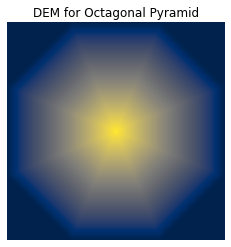

In [2]:
H = np.asarray(Image.open(r"./ConeDEM.tif"))

plt.title("DEM for Octagonal Pyramid")
plt.axis('off')
plt.imshow(H, cmap='cividis')

In [3]:
import sys 
sys.path.insert(0, '..')
from trf import surface, shader

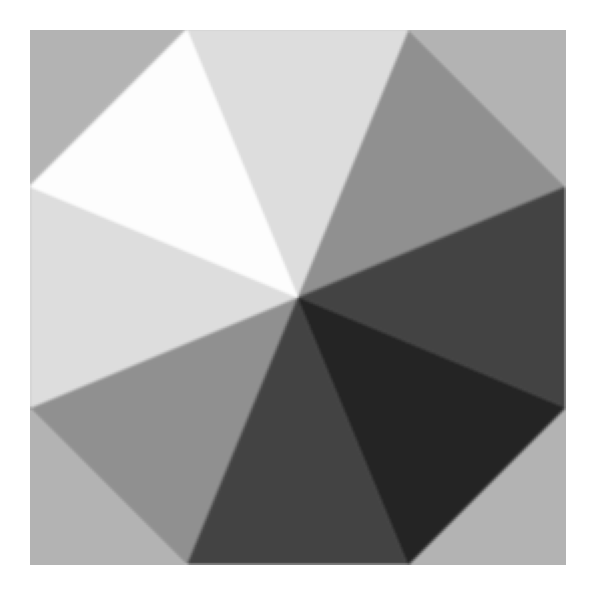

In [7]:
sn = surface.normals(H, 10)
plt.figure(figsize=(6*cm,6*cm), dpi=300)

# create hillshade with a 'standard' light direction of NW at 45 elevation
hs = shader.lambert(sn, np.array([-0.5, 0.5, 0.707]))
#plt.title("Hillshade: NW / 45")
plt.axis('off')
plt.imshow((hs + 1) / 2, cmap='gray', vmin=0.5, vmax=1)

## Multi-Band Figure
Figure size and DPI set for inclusion in the typeset manuscript. 

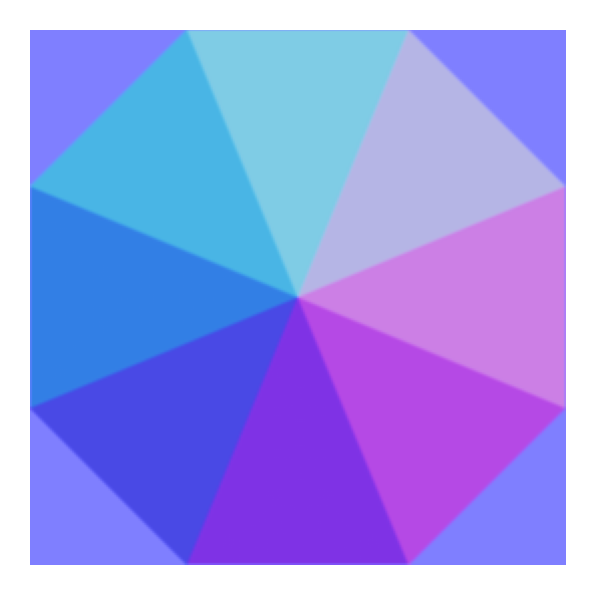

In [8]:
plt.figure(figsize=(6*cm,6*cm), dpi=300)
plt.axis('off')
sn_adjusted = np.moveaxis((sn + 1)/2, 0, 2) # Need to reshape --> surface normals are [band,row,col]; an RGB images is [row,col,band]
plt.imshow(sn_adjusted, vmin=0, vmax=1)

## Figure: Individual Bands

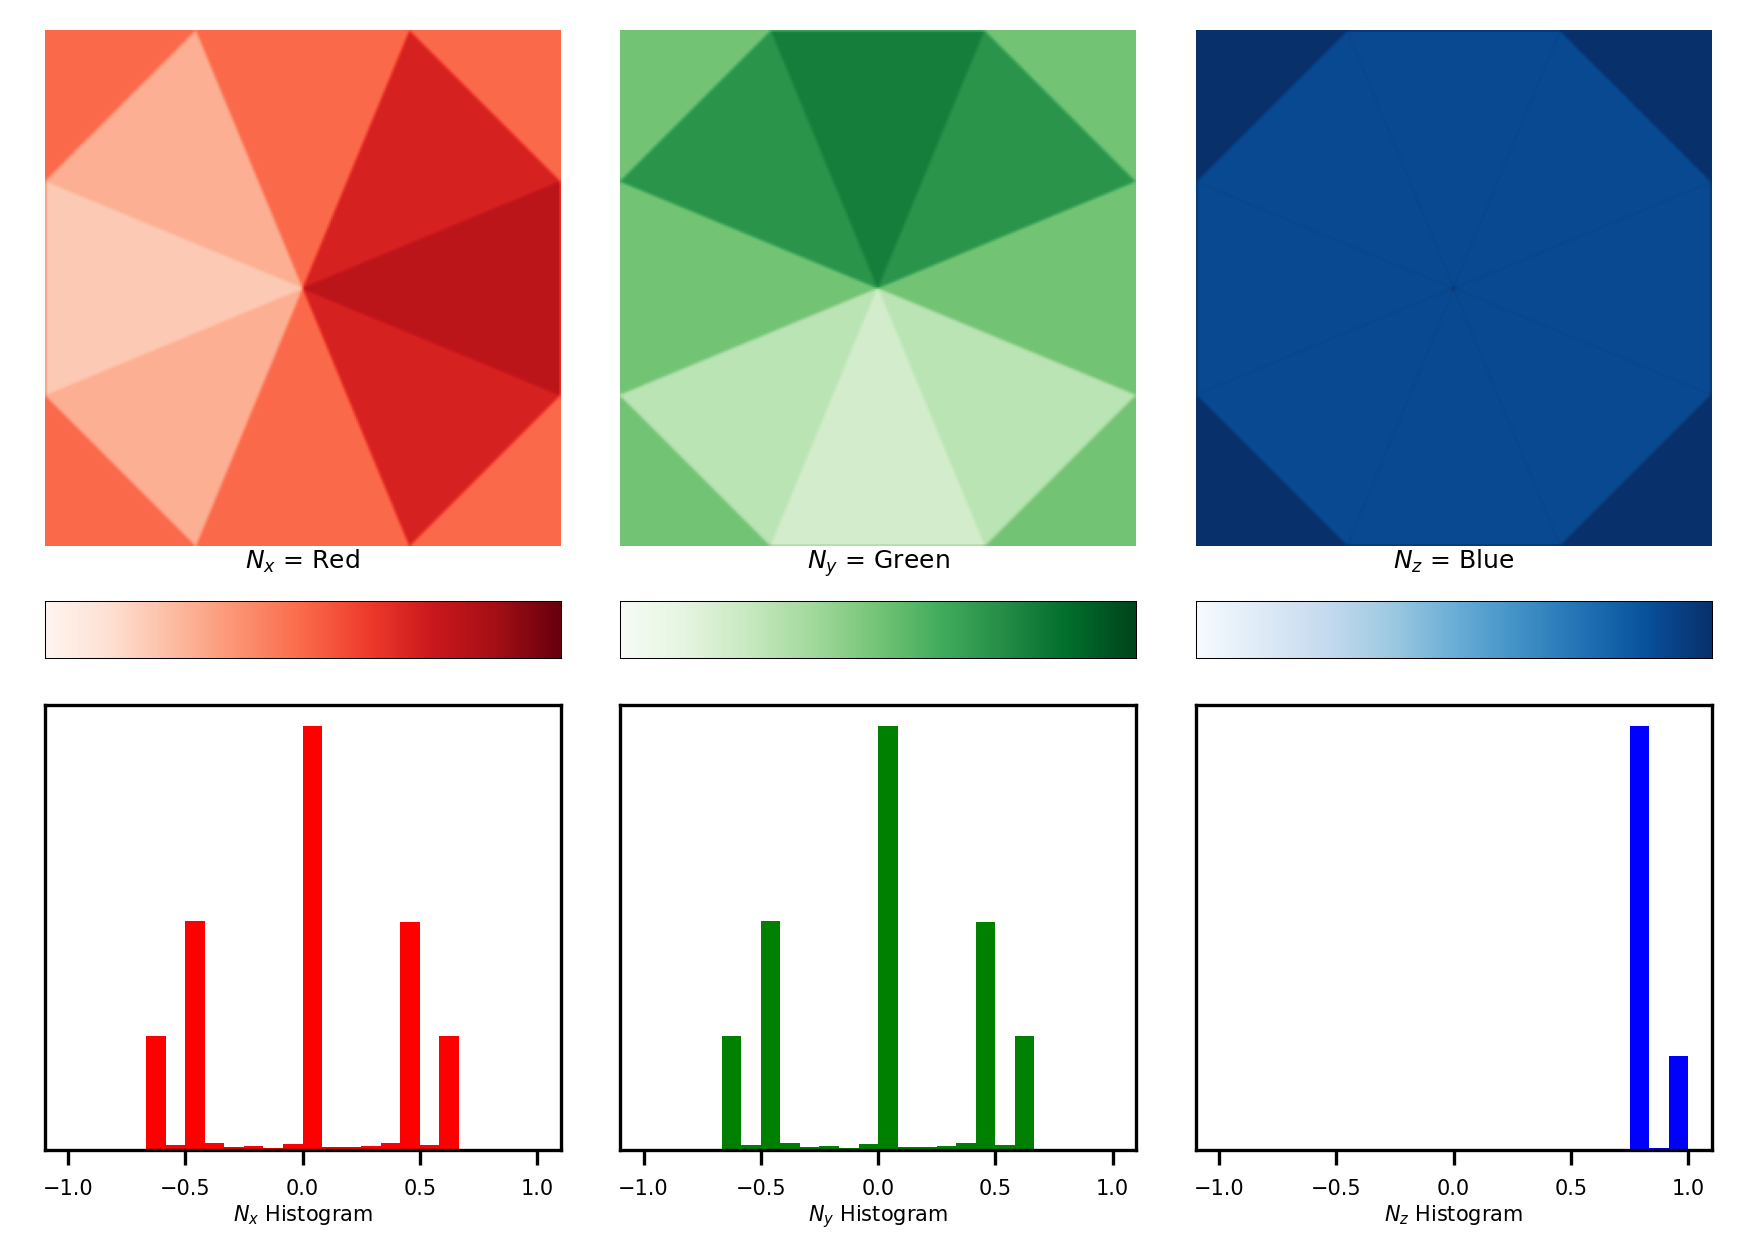

In [6]:
plt.rcParams['figure.figsize'] = (15*cm, 11*cm)
plt.rcParams['figure.dpi'] = 300

ramp = np.zeros([110, 1000])
for i in range(0,1000):
    ramp[:,i] = i/1000 
gs = matplotlib.gridspec.GridSpec(3,3, height_ratios=(3,0.4,2.5))

ax1=plt.subplot(gs[0,0])
ax1.yaxis.set_visible(False)
ax1.xaxis.set_visible(False)
ax1.axis('off')
ax1.imshow(sn_adjusted[:,:,0], cmap='Reds', vmin=0, vmax=1)
ax2=plt.subplot(gs[1,0])
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.set_title("$N_x$ = Red", fontsize=6, pad=8)
ax2.imshow(ramp, cmap='Reds')
ax3=plt.subplot(gs[2,0])
ax3.yaxis.set_visible(False)
ax3.xaxis.set_visible(True)
ax3.tick_params(axis='x', labelsize=5)
ax3.set_xticks([-1, -0.5, 0, 0.5, 1])
ax3.hist(sn[0].ravel(), bins=24, color='red', range=[-1.0 ,1.0])
ax3.set_xlabel("$N_x$ Histogram", fontsize=5, labelpad=1)


ax4=plt.subplot(gs[0,1])
ax4.yaxis.set_visible(False)
ax4.xaxis.set_visible(False)
ax4.axis('off')
ax4.imshow(sn_adjusted[:,:,1], cmap='Greens', vmin=0, vmax=1)
ax5=plt.subplot(gs[1,1])
ax5.yaxis.set_visible(False)
ax5.xaxis.set_visible(False)
ax5.set_title("$N_y$ = Green", fontsize=6, pad=8)
ax5.imshow(ramp, cmap='Greens')
ax6=plt.subplot(gs[2,1])
ax6.yaxis.set_visible(False)
ax6.xaxis.set_visible(True)
ax6.tick_params(axis='x', labelsize=5)
ax6.set_xticks([-1, -0.5, 0, 0.5, 1])
ax6.hist(sn[1].ravel(), bins=24, color='green', range=[-1.0 ,1.0])
ax6.set_xlabel("$N_y$ Histogram", fontsize=5, labelpad=1)

ax7=plt.subplot(gs[0,2])
ax7.yaxis.set_visible(False)
ax7.xaxis.set_visible(False)
ax7.axis('off')
ax7.imshow(sn_adjusted[:,:,2], cmap='Blues', vmin=0, vmax=1)
ax8=plt.subplot(gs[1,2])
ax8.yaxis.set_visible(False)
ax8.xaxis.set_visible(False)
ax8.set_title("$N_z$ = Blue", fontsize=6, pad=8)
ax8.imshow(ramp, cmap='Blues')
ax9=plt.subplot(gs[2,2])
ax9.yaxis.set_visible(False)
ax9.xaxis.set_visible(True)
ax9.tick_params(axis='x', labelsize=5)
ax9.set_xticks([-1, -0.5, 0, 0.5, 1])
ax9.hist(sn[2].ravel(), bins=24, color='blue', range=[-1.0 ,1.0])
ax9.set_xlabel("$N_z$ Histogram", fontsize=5, labelpad=1)

for a in ['top','bottom','left','right']:
    ax8.spines[a].set_linewidth(0.25)
    ax2.spines[a].set_linewidth(0.25)
    ax5.spines[a].set_linewidth(0.25)
plt.tight_layout(h_pad=0.25)